In [45]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import datetime as dt

In [46]:
df = pd.read_csv('D:\\Data\\Cab_Rides.csv')

In [47]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [48]:
df.shape

(1155, 7)

In [49]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [50]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [51]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [52]:
# replacing all NA with their original meaning:
df['PURPOSE*'].fillna('Not Mentioned', inplace = True)

In [53]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [54]:
df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [55]:
df.describe(include='object')

,CATEGORY*,START*,STOP*,PURPOSE*
count,1155,1155,1155,1155
unique,2,177,188,11
top,Business,Cary,Cary,Not Mentioned
freq,1078,201,203,502


In [56]:
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [57]:
pd.to_datetime('12/30/1990')

Timestamp('1990-12-30 00:00:00')

In [58]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [59]:
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [60]:
df['START*'].value_counts()

Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
                      ... 
Ingleside                1
Sunnyvale                1
Flatiron District        1
Jamestown Court          1
Pontchartrain Beach      1
Name: START*, Length: 177, dtype: int64

In [61]:
df['STOP*'].value_counts()

Cary                       203
Unknown Location           149
Morrisville                 84
Whitebridge                 65
Islamabad                   58
                          ... 
Winston Salem                1
Depot Historic District      1
Parkwood                     1
East Elmhurst                1
Pontchartrain Beach          1
Name: STOP*, Length: 188, dtype: int64

In [62]:
df['PURPOSE*'].value_counts()

Not Mentioned      502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

In [63]:
# Extracting weekday name from Start and End Date
df['Start_Day'] = df['START_DATE*'].dt.weekday_name
df['End_Day'] = df['END_DATE*'].dt.weekday_name

In [64]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday


In [65]:
# df['Start_Day'] - df['End_Day']

In [66]:
from dateutil.relativedelta import relativedelta
from datetime import timedelta

In [67]:
# Adding Duration column to our dataframe
df['Duration_of_Ride'] = (df['END_DATE*'] - df['START_DATE*'])/np.timedelta64(1,'m')
# duration of ride is in minutes 'm'

In [68]:
# Checking for Duration_of_ride in our Dataframe 
df.head(50)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day,Duration_of_Ride
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Wednesday,4.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,Wednesday,Wednesday,5.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,Thursday,Thursday,6.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,Sunday,Sunday,20.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,Sunday,Sunday,27.0


In [69]:
# Top 10 rides 
df['Duration_of_Ride'].value_counts().sort_values(ascending = False).head(10)

6.0     51
10.0    50
15.0    50
11.0    48
7.0     46
12.0    44
16.0    44
9.0     43
8.0     43
14.0    42
Name: Duration_of_Ride, dtype: int64

C:\Users\Danish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


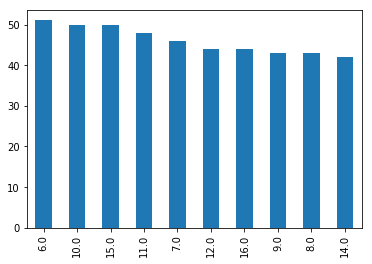

In [70]:
# Plot of top 10 rides
df['Duration_of_Ride'].value_counts().sort_values(ascending = False).head(10).plot('bar')

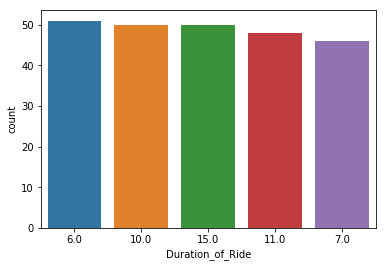

In [71]:
sns.countplot(x='Duration_of_Ride',data=df,order=df.Duration_of_Ride.value_counts().iloc[:5].index)

In [72]:
df['Start_Day'].value_counts()

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: Start_Day, dtype: int64

#### Friday is a rush day as number of rides is maximum and Wednesday is a lean day

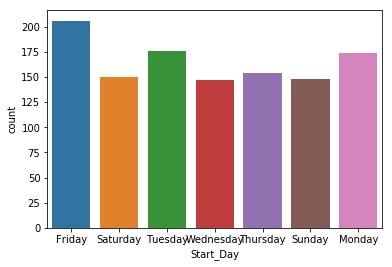

In [73]:
# Plot for Number of rides on a particular weekday
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
sns.countplot(x = 'Start_Day', data = df)

In [74]:
# How to access different information from a date time column ?
# ufo.time.dt.hour
# ufo.time.dt.weekday_name
# ufo.time.dt.weekday
# ufo.time.dt.dayofyear

# ufo is a data frame
# time is a column name

In [75]:
df['Month'] = df['START_DATE*'].dt.month

In [76]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day,Duration_of_Ride,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday,12.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0,1


In [77]:
df['Month'].value_counts()

12    146
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
Name: Month, dtype: int64

#### December had seen maximum number of trips and September is having minimum number of trips

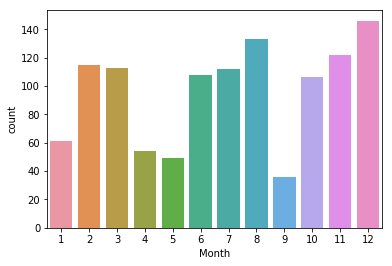

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
sns.countplot(x = 'Month', data = df)

Plot for number of rides in Each Month, December has seen maximum trip and September has seen minimum trip

In [79]:
pd.options.display.max_rows = None
df.head(100)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day,Duration_of_Ride,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday,12.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0,1
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Wednesday,4.0,1
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,Wednesday,Wednesday,5.0,1
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,Thursday,Thursday,6.0,1
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,Sunday,Sunday,20.0,1
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,Sunday,Sunday,27.0,1


In [80]:
df['Ride_Start_Time'] = df['START_DATE*'].dt.hour

In [81]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day,Duration_of_Ride,Month,Ride_Start_Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0,1,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday,12.0,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0,1,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0,1,14


In [82]:
df['Part_of_Day'] = ''

In [83]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day,Duration_of_Ride,Month,Ride_Start_Time,Part_of_Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0,1,21,
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday,12.0,1,1,
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0,1,20,
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0,1,17,
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0,1,14,


In [84]:
for i in range(len(df)):
    if df.loc[i,'Ride_Start_Time'] >= 0 and  df.loc[i,'Ride_Start_Time'] <=5:
        df.loc[i,'Part_of_Day'] = "Midnight"
    elif df.loc[i,'Ride_Start_Time']  > 5 and  df.loc[i,'Ride_Start_Time'] <= 12:
        df.loc[i,'Part_of_Day'] = "Morning"
    elif df.loc[i,'Ride_Start_Time']  > 12 and  df.loc[i,'Ride_Start_Time'] <= 16:
        df.loc[i,'Part_of_Day'] = "Afternoon"
    elif df.loc[i,'Ride_Start_Time']  > 16 and  df.loc[i,'Ride_Start_Time'] <= 19:
        df.loc[i,'Part_of_Day'] = "Evening"
    else:
        df.loc[i,'Part_of_Day'] = "Night"

In [85]:
df.head(50)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day,Duration_of_Ride,Month,Ride_Start_Time,Part_of_Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0,1,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday,12.0,1,1,Midnight
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0,1,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0,1,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0,1,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Wednesday,4.0,1,17,Evening
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,Wednesday,Wednesday,5.0,1,17,Evening
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,Thursday,Thursday,6.0,1,13,Afternoon
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,Sunday,Sunday,20.0,1,8,Morning
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,Sunday,Sunday,27.0,1,12,Morning


In [86]:
# Morning time duration is from 5am to 12 Noon 
# Afternoon time duration is from 12 Noon to 16pm
# Evening time duration is from 16pm to 19pm
# Night time duration is from 19pm to pm 24pm
df.Part_of_Day.value_counts()

Afternoon    369
Morning      317
Evening      257
Night        179
Midnight      33
Name: Part_of_Day, dtype: int64

#### The trips are more during afternoon and minimum during midnight

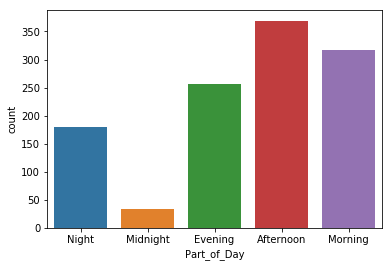

In [87]:
import seaborn as sns
sns.countplot(x = 'Part_of_Day', data = df)

In [88]:
df.groupby('PURPOSE*')['MILES*'].mean()

PURPOSE*
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Not Mentioned        9.748008
Temporary Site      10.474000
Name: MILES*, dtype: float64

In [89]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Day,End_Day,Duration_of_Ride,Month,Ride_Start_Time,Part_of_Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0,1,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,Saturday,Saturday,12.0,1,1,Midnight
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0,1,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0,1,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0,1,14,Afternoon


In [90]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', 'Not Mentioned', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [91]:
df.groupby('PURPOSE*')['MILES*'].mean()

PURPOSE*
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Not Mentioned        9.748008
Temporary Site      10.474000
Name: MILES*, dtype: float64

In [92]:
day_wise_avg_dist = df.groupby(pd.Grouper(key = 'START_DATE*',freq = 'D')).mean()
day_wise_avg_dist.head()

,MILES*,Duration_of_Ride,Month,Ride_Start_Time
START_DATE*,,,,
2016-01-01,5.1,6.0,1.0,21.0
2016-01-02,4.9,12.5,1.0,10.5
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,4.7,14.0,1.0,17.0


In [93]:
day_wise_avg_dist = df.groupby(pd.Grouper(key = 'START_DATE*',freq = 'W')).mean()
day_wise_avg_dist.head()

,MILES*,Duration_of_Ride,Month,Ride_Start_Time
START_DATE*,,,,
2016-01-03,4.966667,10.333333,1.0,14.000000
2016-01-10,12.990000,24.100000,1.0,15.000000
2016-01-17,6.847059,19.529412,1.0,12.882353
2016-01-24,10.170000,18.700000,1.0,12.700000
2016-01-31,7.142857,15.476190,1.0,13.809524


In [94]:
day_wise_avg_dist = df.groupby(pd.Grouper(key = 'START_DATE*',freq = 'W')).mean()
day_wise_avg_dist.head()

,MILES*,Duration_of_Ride,Month,Ride_Start_Time
START_DATE*,,,,
2016-01-03,4.966667,10.333333,1.0,14.000000
2016-01-10,12.990000,24.100000,1.0,15.000000
2016-01-17,6.847059,19.529412,1.0,12.882353
2016-01-24,10.170000,18.700000,1.0,12.700000
2016-01-31,7.142857,15.476190,1.0,13.809524
